In [1]:
#!/usr/bin/python

import uproot
from icecream import ic
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import subprocess
import os
import time
import shutil
from shutil import copyfile


In [2]:
"""
Methods and constants to help pandas algebra without using ROOT.
Borrowed Directly from Sangbaek
"""
import numpy as np

def dot(vec1, vec2):
	# dot product of two 3d vectors
    return vec1[0]*vec2[0]+vec1[1]*vec2[1]+vec1[2]*vec2[2]

def mag(vec1):
	# L2 norm of vector
	return np.sqrt(dot(vec1, vec1))

def mag2(vec1):
	# square of L2 norm
	return	dot(vec1, vec1)

def cosTheta(vec1, vec2):
	# cosine angle between two 3d vectors
    return dot(vec1,vec2)/np.sqrt(mag2(vec1) * mag2(vec2))

def angle(vec1, vec2):
	# angle between two 3d vectors
	return 180/np.pi*np.arccos(np.minimum(1, cosTheta(vec1, vec2)))

def cross(vec1, vec2):
	# cross product of two 3d vectors
    return [vec1[1]*vec2[2]-vec1[2]*vec2[1], vec1[2]*vec2[0]-vec1[0]*vec2[2], vec1[0]*vec2[1]-vec1[1]*vec2[0]]

def vecAdd(gam1, gam2):
	# add two 3d vectors
	return [gam1[0]+gam2[0], gam1[1]+gam2[1], gam1[2]+gam2[2]]

def pi0Energy(gam1, gam2):
	# reconstructed pi0 energy of two 3d photon momenta
	return mag(gam1)+mag(gam2)

def pi0InvMass(gam1, gam2):
	# pi0 invariant mass of two 3d photon momenta
	pi0mass2 = pi0Energy(gam1, gam2)**2-mag2(vecAdd(gam1, gam2))
	pi0mass2 = np.where(pi0mass2 >= 0, pi0mass2, 10**6)
	pi0mass = np.sqrt(pi0mass2)
	pi0mass = np.where(pi0mass > 100, -1000, pi0mass)
	return pi0mass

def getPhi(vec1):
	# azimuthal angle of one 3d vector
	return 180/np.pi*np.arctan2(vec1[1], vec1[0])

def getTheta(vec1):
	# polar angle of one 3d vector
	return 180/np.pi*np.arctan2(np.sqrt(vec1[0]*vec1[0]+vec1[1]*vec1[1]), vec1[2])

def getEnergy(vec1, mass):
	# for taken 3d momenta p and mass m, return energy = sqrt(p**2 + m**2)
	return np.sqrt(mag2(vec1)+mass**2)

M = 0.938272081 # target mass
me = 0.5109989461 * 0.001 # electron mass
ebeam = 10.604 # beam energy
pbeam = np.sqrt(ebeam * ebeam - me * me) # beam electron momentum
beam = [0, 0, pbeam] # beam vector
target = [0, 0, 0] # target vector

In [3]:
M = 0.938272081
me = 0.5109989461 * 0.001
ebeam = 10.604
pbeam = np.sqrt(ebeam * ebeam - me * me)
beam = [0, 0, pbeam]
target = [0, 0, 0]

In [169]:
data_path = "/mnt/c/Users/rober/Dropbox/Bobby/Linux/work/CLAS12/mit-clas12-analysis/theana/paragon/dvep/data/2_after_particle_fiducial_cuts/F18_Inbending_FD_SangbaekSkim_0_20210205/F18_Inbending_FD_SangbaekSkim_0_20210205/"


In [170]:
# initialize df
df_electron = pd.DataFrame()
df_proton = pd.DataFrame()
df_gamma = pd.DataFrame()

In [171]:
file_names = os.listdir(data_path)
print(file_names)

['skim8_005032_filtered.root', 'skim8_005036_filtered.root', 'skim8_005038_filtered.root', 'skim8_005039_filtered.root', 'skim8_005040_filtered.root', 'skim8_005041_filtered.root', 'skim8_005043_filtered.root', 'skim8_005045_filtered.root', 'skim8_005046_filtered.root', 'skim8_005047_filtered.root', 'skim8_005051_filtered.root', 'skim8_005052_filtered.root', 'skim8_005053_filtered.root', 'skim8_005116_filtered.root', 'skim8_005117_filtered.root', 'skim8_005119_filtered.root', 'skim8_005120_filtered.root', 'skim8_005124_filtered.root', 'skim8_005125_filtered.root', 'skim8_005126_filtered.root', 'skim8_005127_filtered.root', 'skim8_005128_filtered.root', 'skim8_005129_filtered.root', 'skim8_005130_filtered.root', 'skim8_005137_filtered.root', 'skim8_005138_filtered.root', 'skim8_005139_filtered.root', 'skim8_005153_filtered.root', 'skim8_005158_filtered.root', 'skim8_005159_filtered.root', 'skim8_005160_filtered.root', 'skim8_005162_filtered.root', 'skim8_005163_filtered.root', 'skim8_00

In [172]:
#for key in ["RunNum","EventNum",'helicity','helicityRaw',"beamQ","Epx", "Epy", "Epz", "Evz", "Etheta","Ephi"]:
#    df_electron[key] = tree[key].array(library="pd")


file_names = ["skim8_005032_filtered.root","skim8_005032_filtered.root"]

dfs_e = []
dfs_p = []
dfs_g = []

for file_name in file_names:
    df_electron0 = pd.DataFrame()
    df_proton0 = pd.DataFrame()
    df_gamma0 = pd.DataFrame()
    df_logi = pd.DataFrame()
    
    file = uproot.open(data_path + file_name)

    tree = file["T"]   
    print(tree.keys())

    for key in ["Epx", "Epy", "Epz", "Evz", "Etheta","Ephi"]:
        df_electron0[key] = tree[key].array(library="pd")

    for key in ["Ppx", "Ppy", "Ppz", "Pvz", "Pstat", "PorigIndx", "Ptheta","Pphi"]:
        df_proton0[key] = tree[key].array(library="pd")


    for key in ["Gpx", "Gpy", "Gpz", "Gstat", "GorigIndx", "Gtheta","Gphi"]:
        df_gamma0[key] = tree[key].array(library="pd")
        
    logistics = ["RunNum", "EventNum", "beamQ", "helicity"]
    for key in logistics:
        df_logi[key] = tree[key].array(library="pd")
        
    
    dfs_e.append(df_electron0)
    dfs_p.append(df_proton0)
    dfs_g.append(df_gamma0)
    
df_electron = pd.concat(dfs_e)
df_proton = pd.concat(dfs_p)
df_gamma = pd.concat(dfs_g)

    
print(df_electron)
print(df_proton)
print(df_gamma)


['nmb', 'Pp', 'Ppx', 'Ppy', 'Ppz', 'Ptheta', 'Pphi', 'Pvx', 'Pvy', 'Pvz', 'Pvt', 'Pbeta', 'Pstat', 'PorigIndx', 'nml', 'Ep', 'Epx', 'Epy', 'Epz', 'Etheta', 'Ephi', 'Evx', 'Evy', 'Evz', 'Evt', 'Ebeta', 'Estat', 'EorigIndx', 'nmg', 'Gp', 'Gpx', 'Gpy', 'Gpz', 'Gtheta', 'Gphi', 'Gvx', 'Gvy', 'Gvz', 'Gvt', 'Gbeta', 'Gstat', 'GorigIndx', 'beamQ', 'liveTime', 'startTime', 'RFTime', 'helicity', 'helicityRaw', 'EventNum', 'RunNum', 'Q2', 'Nu', 'q', 'qx', 'qy', 'qz', 'W2', 'xB', 't']
['nmb', 'Pp', 'Ppx', 'Ppy', 'Ppz', 'Ptheta', 'Pphi', 'Pvx', 'Pvy', 'Pvz', 'Pvt', 'Pbeta', 'Pstat', 'PorigIndx', 'nml', 'Ep', 'Epx', 'Epy', 'Epz', 'Etheta', 'Ephi', 'Evx', 'Evy', 'Evz', 'Evt', 'Ebeta', 'Estat', 'EorigIndx', 'nmg', 'Gp', 'Gpx', 'Gpy', 'Gpz', 'Gtheta', 'Gphi', 'Gvx', 'Gvy', 'Gvz', 'Gvt', 'Gbeta', 'Gstat', 'GorigIndx', 'beamQ', 'liveTime', 'startTime', 'RFTime', 'helicity', 'helicityRaw', 'EventNum', 'RunNum', 'Q2', 'Nu', 'q', 'qx', 'qy', 'qz', 'W2', 'xB', 't']
                     Epx       Epy       E

In [173]:
# change the data type to double, Sangbaek knows why
df_electron = df_electron.astype({"Epx": float, "Epy": float, "Epz": float})
df_proton = df_proton.astype({"Ppx": float, "Ppy": float, "Ppz": float})
df_gamma = df_gamma.astype({"Gpx": float, "Gpy": float, "Gpz": float})

In [174]:
#Get proper indexing before merging
df_electron['event'] = df_electron.index.get_level_values('entry')
df_proton['event'] = df_proton.index.get_level_values('entry')
df_gamma['event'] = df_gamma.index.get_level_values('entry')
df_gamma['GSubIndex'] = df_gamma.index.get_level_values('subentry')


In [175]:
#df_gamma = df_gamma.head(10)
#df_proton = df_proton.head(10)
#df_electron = df
print(df_gamma)


                     Gpx       Gpy       Gpz  Gstat  GorigIndx    Gtheta  \
entry subentry                                                             
0     0         0.085952 -0.334371  1.236142   2020          0  0.272350   
      1         0.082031 -0.208803  0.415269   2020          0  0.495307   
1     0         0.218296 -0.198232  0.598252   2020          0  0.457942   
      1         0.105162 -0.026216  0.437452   2010          0  0.242864   
2     0        -0.034353  0.133768  0.697854   2020          0  0.195380   
...                  ...       ...       ...    ...        ...       ...   
57158 0        -0.101463 -0.171937  0.664657   2020          0  0.291796   
      1         0.006586  0.067445  0.105263   2010          0  0.571989   
57159 0         0.115726  0.203449  0.437291   2130          0  0.491448   
      1         0.191338 -0.068104  0.393181   2010          0  0.476799   
      2         0.028852  0.100585  0.351145   2130          0  0.289621   

           

In [176]:
df_gg = pd.merge(df_gamma, df_gamma,
    how='outer', on='event', suffixes=("", "2"))
df_gg = df_gg[df_gg["GSubIndex"] < df_gg["GSubIndex2"]]

In [177]:
print(df_gg)

              Gpx       Gpy       Gpz  Gstat  GorigIndx    Gtheta      Gphi  \
1        0.085952 -0.334371  1.236142   2020          0  0.272350 -1.319189   
3        0.085952 -0.334371  1.236142   2020          0  0.272350 -1.319189   
9        0.085952 -0.334371  1.236142   2020          0  0.272350 -1.319189   
11       0.085952 -0.334371  1.236142   2020          0  0.272350 -1.319189   
17       0.218296 -0.198232  0.598252   2020          0  0.457942 -0.737265   
...           ...       ...       ...    ...        ...       ...       ...   
2143364  0.115726  0.203449  0.437291   2130          0  0.491448  1.053620   
2143366  0.115726  0.203449  0.437291   2130          0  0.491448  1.053620   
2143367  0.115726  0.203449  0.437291   2130          0  0.491448  1.053620   
2143370  0.191338 -0.068104  0.393181   2010          0  0.476799 -0.341952   
2143373  0.191338 -0.068104  0.393181   2010          0  0.476799 -0.341952   

         event  GSubIndex      Gpx2      Gpy2      

In [178]:
#Now new indexing, which conserves event number information at "event" column
df_ep = pd.merge(df_electron, df_proton, how='outer', on='event')
df_epg = pd.merge(df_ep, df_gamma, how='outer', on='event')
df_epgg = pd.merge(df_ep, df_gg, how='outer', on='event')
df_epgg = df_epgg[~np.isnan(df_epgg["Gpx"])]

In [179]:
print(df_epgg)

              Epx       Epy       Epz       Evz    Etheta      Ephi  event  \
0        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
1        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
2        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
3        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
4        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
...           ...       ...       ...       ...       ...       ...    ...   
3096651 -0.153188 -0.607261  2.778714 -0.928987  0.221682 -1.817901  57159   
3096652 -0.153188 -0.607261  2.778714 -0.928987  0.221682 -1.817901  57159   
3096653 -0.153188 -0.607261  2.778714 -0.928987  0.221682 -1.817901  57159   
3096654 -0.153188 -0.607261  2.778714 -0.928987  0.221682 -1.817901  57159   
3096655 -0.153188 -0.607261  2.778714 -0.928987  0.221682 -1.817901  57159   

              Ppx       Ppy       Ppz  ...      Gphi  GSubIndex

In [180]:
#cuts on vertex
df_epg=df_epg[np.abs(df_epg["Evz"]-df_epg["Pvz"])<2.5+2.5/mag([df_epg["Epx"],df_epg["Epy"],df_epg["Epz"]])]
df_epgg=df_epgg[np.abs(df_epgg["Evz"]-df_epgg["Pvz"])<2.5+2.5/mag([df_epgg["Epx"],df_epgg["Epy"],df_epgg["Epz"]])]

In [181]:
print(df_epgg)

              Epx       Epy       Epz       Evz    Etheta      Ephi  event  \
0        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
1        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
2        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
3        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
4        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
...           ...       ...       ...       ...       ...       ...    ...   
3096571  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096572  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096573  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096574  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096575  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   

              Ppx       Ppy       Ppz  ...      Gphi  GSubIndex

In [182]:

# basic particle energies
df_epgg['Ee'] = np.sqrt(me**2 + df_epgg["Epx"]**2 + df_epgg["Epy"]**2 + df_epgg["Epz"]**2)
df_epgg['Pe'] = np.sqrt(M**2 + df_epgg["Ppx"]**2 + df_epgg["Ppy"]**2 + df_epgg["Ppz"]**2)
df_epgg['Ge'] = np.sqrt(df_epgg["Gpx"]**2 + df_epgg["Gpy"]**2 + df_epgg["Gpz"]**2)
df_epgg['Ge2'] = np.sqrt(df_epgg["Gpx2"]**2 + df_epgg["Gpy2"]**2 + df_epgg["Gpz2"]**2)

In [195]:
# useful objects
ele = [df_epgg['Epx'], df_epgg['Epy'], df_epgg['Epz']]
pro = [df_epgg['Ppx'], df_epgg['Ppy'], df_epgg['Ppz']]
gam = [df_epgg['Gpx'], df_epgg['Gpy'], df_epgg['Gpz']]
gam2 = [df_epgg['Gpx2'], df_epgg['Gpy2'], df_epgg['Gpz2']]
pi0 = vecAdd(gam, gam2)
VGS = [-df_epgg['Epx'], -df_epgg['Epy'], pbeam - df_epgg['Epz']]
v3l = cross(beam, ele)
v3h = cross(pro, VGS)
v3g = cross(VGS, gam)
VmissPi0 = [-df_epgg["Epx"] - df_epgg["Ppx"], -df_epgg["Epy"] -
            df_epgg["Ppy"], pbeam - df_epgg["Epz"] - df_epgg["Ppz"]]
Vmiss = [-df_epgg["Epx"] - df_epgg["Ppx"] - df_epgg["Gpx"] - df_epgg["Gpx2"],
            -df_epgg["Epy"] - df_epgg["Ppy"] - df_epgg["Gpy"] - df_epgg["Gpy2"],
            pbeam - df_epgg["Epz"] - df_epgg["Ppz"] - df_epgg["Gpz"] - df_epgg["Gpz2"]]
VmissP = [-df_epgg["Epx"] - df_epgg["Gpx"] - df_epgg["Gpx2"],
            -df_epgg["Epy"] - df_epgg["Gpy"] - df_epgg["Gpy2"],
            pbeam - df_epgg["Epz"] - df_epgg["Gpz"] - df_epgg["Gpz2"]]

In [197]:

# binning kinematics
df_epgg['Q2'] = -((ebeam - df_epgg['Ee'])**2 - mag2(VGS))
df_epgg['nu'] = (ebeam - df_epgg['Ee'])
df_epgg['xB'] = df_epgg['Q2'] / 2.0 / M / df_epgg['nu']
df_epgg['W'] = np.sqrt((ebeam + M - df_epgg['Ee'])**2 - mag2(VGS))
#df_epgg['MPt'] = np.sqrt((df_epgg["Epx"] + df_epgg["Ppx"] + df_epgg["Gpx"] + df_epgg["Gpx2"])**2 +
#                        (df_epgg["Epy"] + df_epgg["Ppy"] + df_epgg["Gpy"] + df_epgg["Gpy2"])**2)

In [194]:
print(df_epgg)

              Epx       Epy       Epz       Evz    Etheta      Ephi  event  \
0        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
1        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
2        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
3        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
4        0.128060  0.794708  2.058435  0.020737  0.372771  1.411029      0   
...           ...       ...       ...       ...       ...       ...    ...   
3096571  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096572  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096573  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096574  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   
3096575  0.615304 -1.258897  8.077948 -0.946698  0.171753 -1.116177  57156   

              Ppx       Ppy       Ppz  ...         W       MPt 

In [186]:
# exclusivity variables
df_epgg['MM2_ep'] = (-M - ebeam + df_epgg["Ee"] +
                     df_epgg["Pe"])**2 - mag2(VmissPi0)
df_epgg['MM2_egg'] = (-M - ebeam + df_epgg["Ee"] +
                     df_epgg["Ge"] + df_epgg["Ge2"])**2 - mag2(VmissP)
df_epgg['MM2_epgg'] = (-M - ebeam + df_epgg["Ee"] +
                     df_epgg["Pe"] + df_epgg["Ge"] + df_epgg["Ge2"])**2 - mag2(Vmiss)
df_epgg['ME_epgg'] = (M + ebeam - df_epgg["Ee"] - df_epgg["Pe"] - df_epgg["Ge"] - df_epgg["Ge2"])
df_epgg['Mpi0'] = pi0InvMass(gam, gam2)
df_epgg['reconPi'] = angle(VmissPi0, pi0)
df_epgg["Pie"] = df_epgg['Ge'] + df_epgg['Ge2']
df_epgg["sintheta"] = np.sin(np.pi/180.*angle(gam, gam2))

In [187]:

#	Kinematic cuts
#   xB>0 && xB<1 && W>2 && Q2>1 && VE.e()>2 && VG1.e() > 2 && VP.p() > 0.12
cut_pFD = df_epgg["Pstat"] < 4000  # FD
cut_pCD = df_epgg["Pstat"] > 4000  # CD
cut_gFD = df_epgg["Gstat"] > 2000  # FD
cut_gFT = df_epgg["Gstat"] < 2000  # FT
cut_g2FD = df_epgg["Gstat2"] > 2000  # FD
cut_g2FT = df_epgg["Gstat2"] < 2000  # FT
cut_FTFT = cut_gFT & cut_g2FT
cut_FDFT = cut_gFD & cut_g2FT
cut_FTFD = cut_gFT & cut_g2FD
cut_FDFD = cut_gFD & cut_g2FD
cut_xBupper = df_epgg["xB"] < 1  # xB
cut_xBlower = df_epgg["xB"] > 0  # xB
cut_Q2 = df_epgg["Q2"] > 1  # Q2
cut_W = df_epgg["W"] > 2  # W

In [188]:
#	Exclusivity cuts
cut_mmep = df_epgg["MM2_ep"] < 0.7  # mmep
cut_meepgg = df_epgg["ME_epgg"] < 0.7  # meepgg
cut_mpt = df_epgg["MPt"] < 0.2  # mpt
cut_recon = df_epgg["reconPi"] < 2  # recon gam angle
cut_pi0upper = df_epgg["Mpi0"] < 0.2
cut_pi0lower = df_epgg["Mpi0"] > 0.07
cut_pi0energy = 1#(df_epgg["Pie"] > 2) & (df_epgg["Pie"] <4)
# cut_maxE = 1#df_epgg[["Ge", "Ge2"]].max(1) > 2
cut_minE = 1#df_epgg[["Ge", "Ge2"]].min(1) > 1
#cut_sector = (df_epgg["Esector"]!=df_epgg["Gsector"]) & (df_epgg["Esector"]!=df_epgg["Gsector2"])

In [189]:
df_dvpi0 = df_epgg[ cut_xBupper & cut_xBlower & cut_Q2 & cut_W & cut_mmep & cut_meepgg &
                   cut_mpt & cut_recon & cut_pi0upper & cut_pi0lower & cut_minE & cut_pi0energy]
# df_dvpi0.loc[:, "Mpi0"] = df_dvpi0["Mpi0"]/0.1349768
print(len(df_dvpi0))
mpi0_edges = np.linspace(0.5, 1.5, 101)
# df_dvpi0.loc[:,"Mpi0"]

4176


In [190]:
print(df_dvpi0)

              Epx       Epy       Epz       Evz    Etheta      Ephi  event  \
3280    -0.929717 -0.191156  5.264612 -2.347387  0.178375 -2.938812     62   
3281    -0.929717 -0.191156  5.264612 -2.347387  0.178375 -2.938812     62   
3282    -0.929717 -0.191156  5.264612 -2.347387  0.178375 -2.938812     62   
3283    -0.929717 -0.191156  5.264612 -2.347387  0.178375 -2.938812     62   
3284    -0.929717 -0.191156  5.264612 -2.347387  0.178375 -2.938812     62   
...           ...       ...       ...       ...       ...       ...    ...   
3094352 -0.178679 -0.458861  1.626655 -2.192939  0.293951 -1.942129  57114   
3094361 -0.178679 -0.458861  1.626655 -2.192939  0.293951 -1.942129  57114   
3094364 -0.178679 -0.458861  1.626655 -2.192939  0.293951 -1.942129  57114   
3094373 -0.178679 -0.458861  1.626655 -2.192939  0.293951 -1.942129  57114   
3094376 -0.178679 -0.458861  1.626655 -2.192939  0.293951 -1.942129  57114   

              Ppx       Ppy       Ppz  ...         W       MPt 

4176
1.0290344771157294


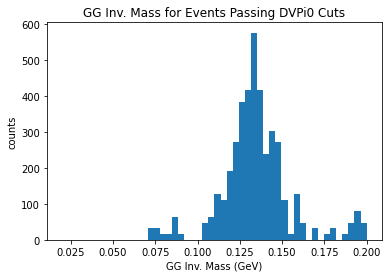

In [191]:
fig, ax = plt.subplots()
#cmap = copy(plt.cm.get_cmap("jet"))
df_sym = df_dvpi0
print(len(df_sym))
print(((0.1349768/df_sym["Mpi0"])).mean())
# ax.hist2d(df_sym["Ge"], (0.1349768/df_sym["Mpi0"])**2-1, bins = [51, 51], cmap = cmap, cmin = 1)
ax.hist(df_sym["Mpi0"], bins = np.linspace(0.02, 0.2, 51))
# plt.xlim([-0.5, 1.2])
# ax.hist2d(df_sym["Ge2"], (df_sym["Mpi0"]/0.1349768), bins = [51, 51], cmap = cmap, cmin = 1)
plt.xlabel("GG Inv. Mass (GeV)")
plt.ylabel("counts")
plt.title("GG Inv. Mass for Events Passing DVPi0 Cuts")
# ax.hist(df_dvpi0["Mpi0"], bins = 101)
plt.show()

array([[<AxesSubplot:title={'center':'xB'}>]], dtype=object)

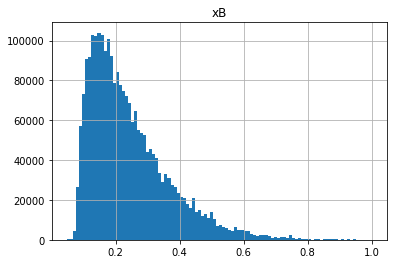

In [192]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
df_epgg.query(
    "xB < 1").hist(
    column="xB", bins=100)